<a href="https://colab.research.google.com/github/sajeeshen/Linear-Regression/blob/main/Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/CarPrice_Assignment.csv")

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.shape

(205, 26)

In [ ]:
CompanyName= df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3, 'CompanyName', CompanyName)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
maxda           2
vw              2
renault         2
porcshce        1
mercury         1
vokswagen       1
toyouta         1
Nissan          1
Name: CompanyName, dtype: int64

In [ ]:
df.CompanyName = df.CompanyName.str.lower()

In [ ]:
def replace_car_name(old_value, new_value):

  df.replace(old_value, new_value, inplace=True)

replace_car_name('alfa-romero', 'alfa-romeo')
replace_car_name('maxda', 'mazda')
replace_car_name('porcshce', 'porsche')
replace_car_name('toyouta', 'toyota')
replace_car_name('vokswagen', 'volkswagen')
replace_car_name('vw', 'volkswagen')


In [ ]:
df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## EDA

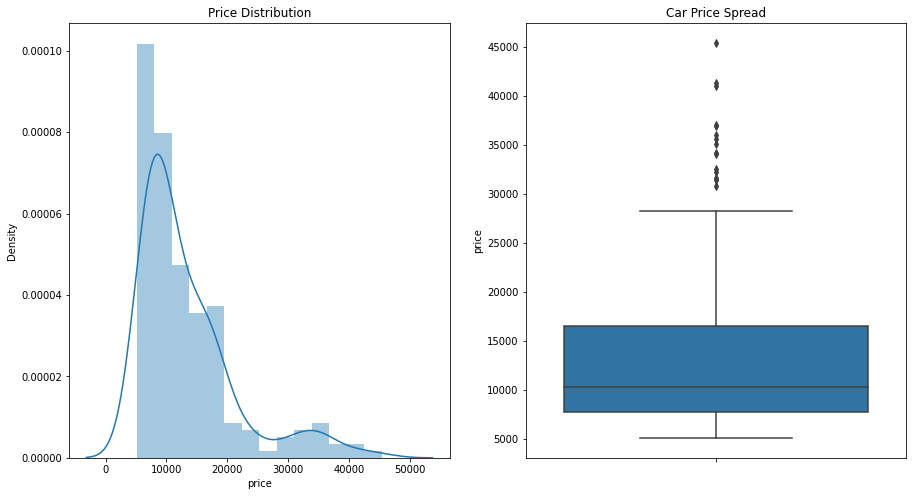

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("Price Distribution")
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y=df.price)
plt.show()


In [ ]:
print(df.price.describe(percentiles=[0.25,0.50,0.75, 0.85, 0.9,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


## Categorical Data Visualization

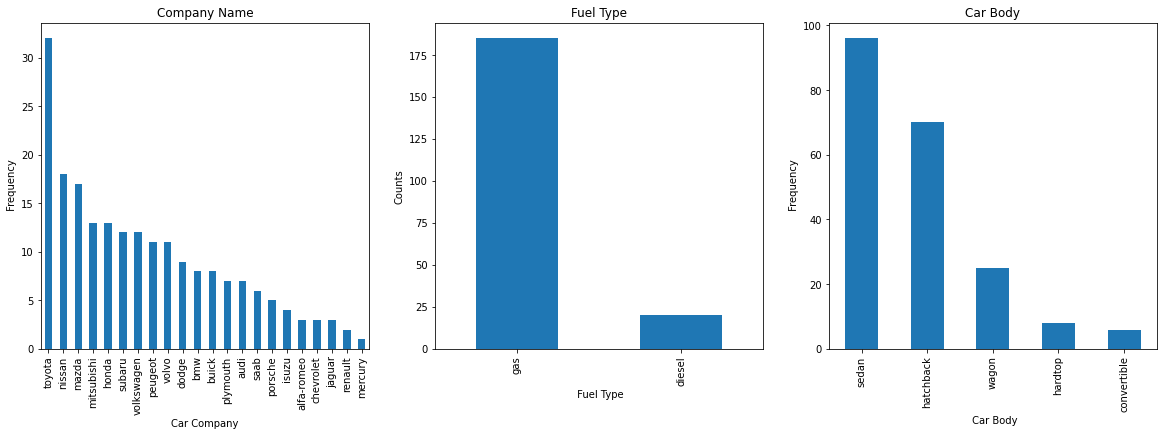

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind='bar')
plt.title("Company Name")
plt1.set(xlabel='Car Company', ylabel=' Frequency')

plt.subplot(1,3,2)
plt2 = df.fueltype.value_counts().plot(kind='bar')
plt.title("Fuel Type")
plt2.set(xlabel=' Fuel Type', ylabel='Counts')

plt.subplot(1,3,3)
plt3 = df.carbody.value_counts().plot(kind='bar')
plt.title("Car Body")
plt3.set(xlabel=' Car Body', ylabel=' Frequency')
plt.show()


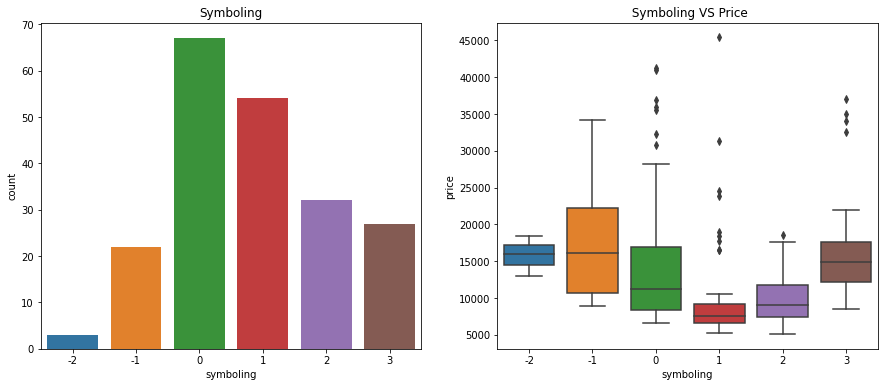

In [ ]:
# Symboling
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Symboling")
sns.countplot(df.symboling)

plt.subplot(1,2,2)
plt.title(" Symboling VS Price")
sns.boxplot(x=df.symboling, y=df.price)
plt.show()


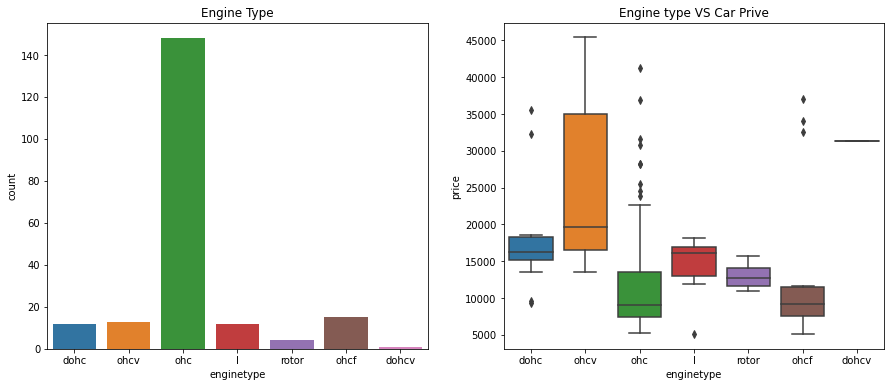

In [ ]:
# Engine Type
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Engine Type")
sns.countplot(df.enginetype)

plt.subplot(1,2,2)
plt.title("Engine type VS Car Prive")
sns.boxplot(x=df.enginetype, y=df.price)

plt.show()


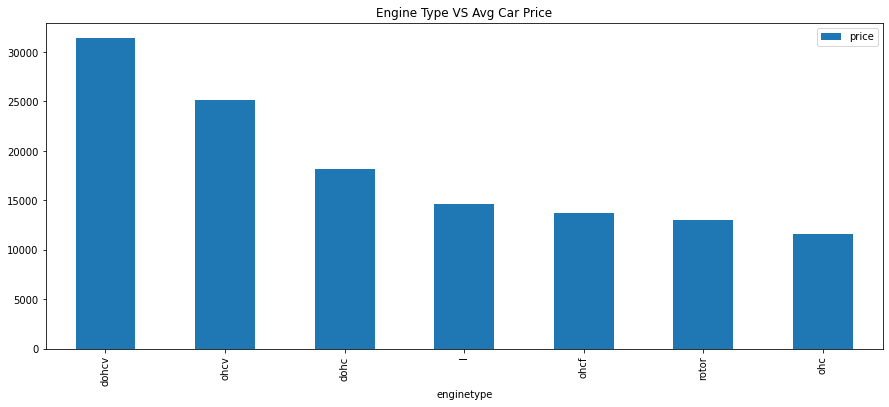

In [ ]:
car_engine_avg = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
car_engine_avg.plot.bar(figsize=(15,6))
plt.title("Engine Type VS Avg Car Price")
plt.show()

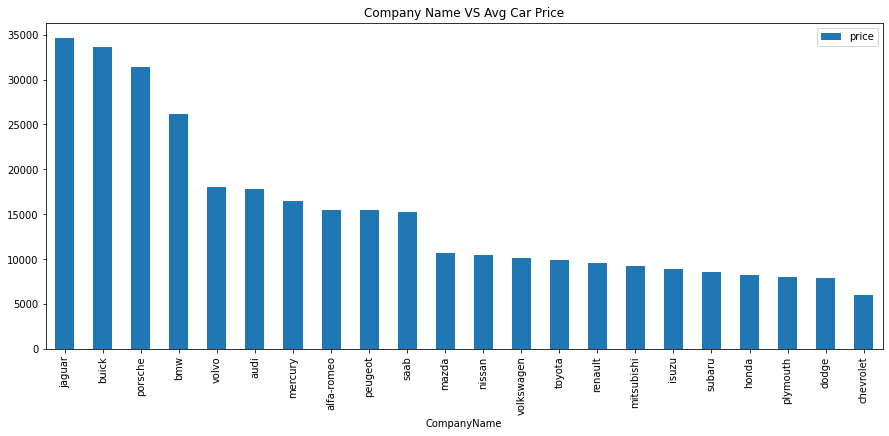

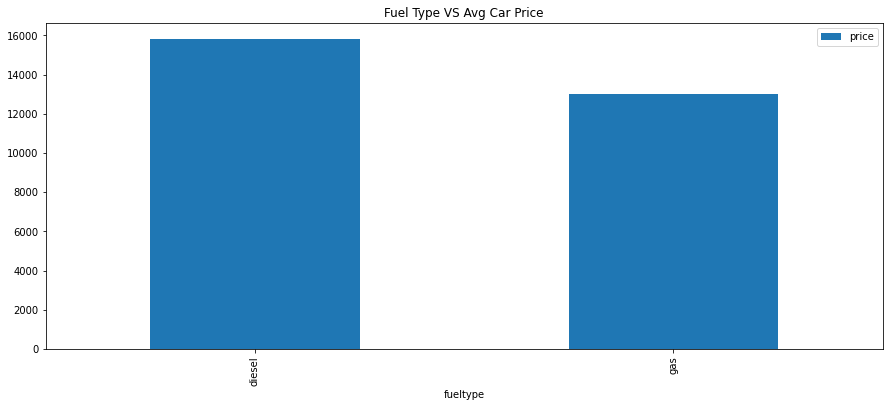

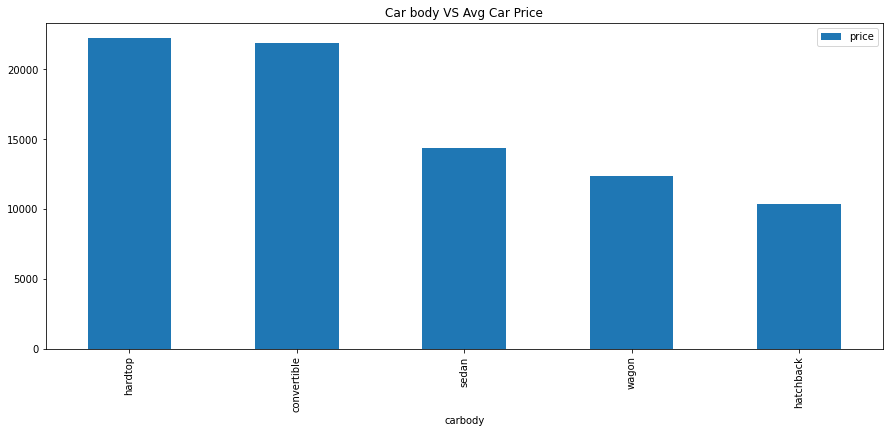

In [ ]:
df_temp = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df_temp.plot.bar(figsize=(15,6))
plt.title("Company Name VS Avg Car Price")
plt.show()

df_temp = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df_temp.plot.bar(figsize=(15,6))
plt.title("Fuel Type VS Avg Car Price")
plt.show()

df_temp = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df_temp.plot.bar(figsize=(15,6))
plt.title("Car body VS Avg Car Price")
plt.show()

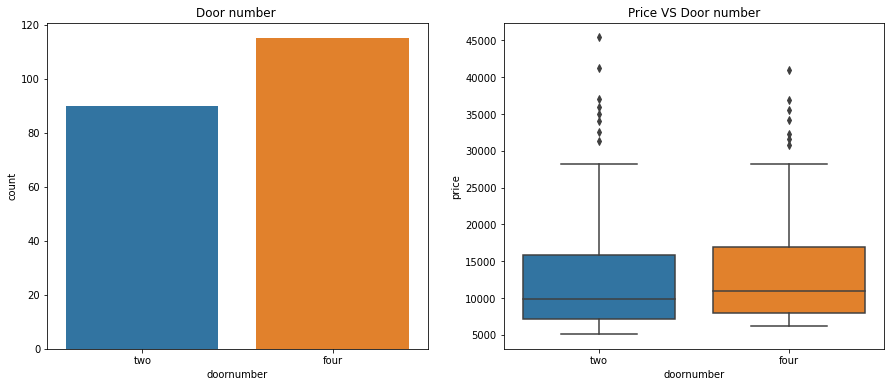

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df.doornumber)
plt.title("Door number ")

plt.subplot(1,2,2)
sns.boxplot(x=df.doornumber, y=df.price)
plt.title("Price VS Door number")
plt.show()

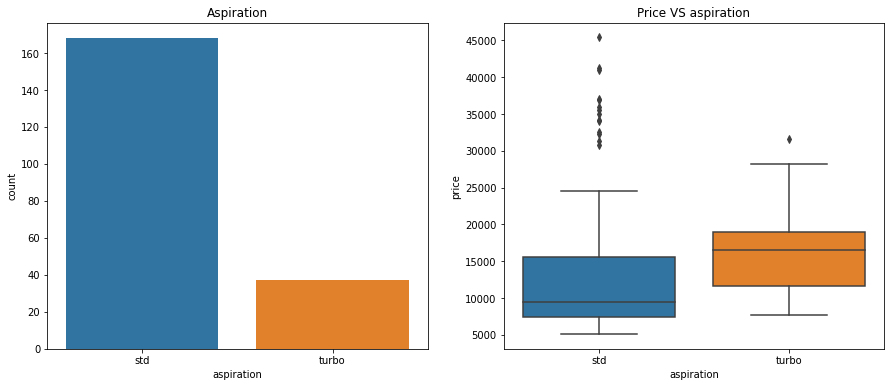

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df.aspiration)
plt.title("Aspiration")

plt.subplot(1,2,2)
sns.boxplot(x=df.aspiration, y=df.price)
plt.title("Price VS aspiration")
plt.show()

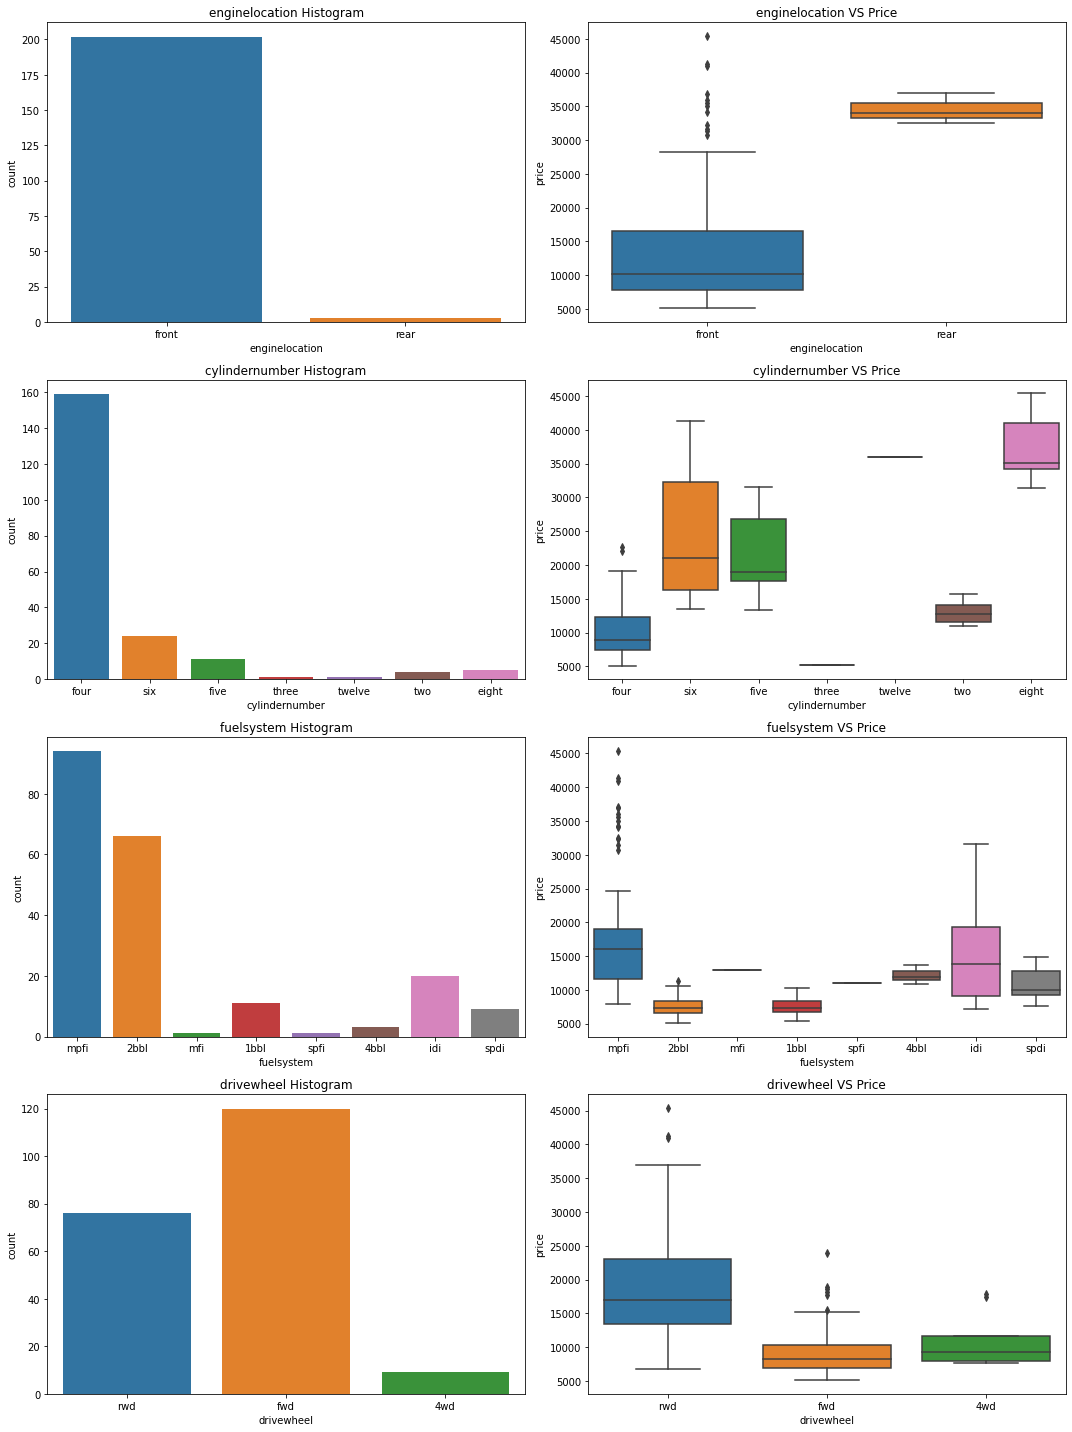

In [ ]:
def plot_count(x,fig):

  plt.subplot(4,2, fig)
  plt.title(x+" Histogram")
  sns.countplot(df[x])
  plt.subplot(4,2, (fig+1))
  plt.title(x+" VS Price")
  sns.boxplot(x=df[x], y=df['price'])

plt.figure(figsize=(15,20))
plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

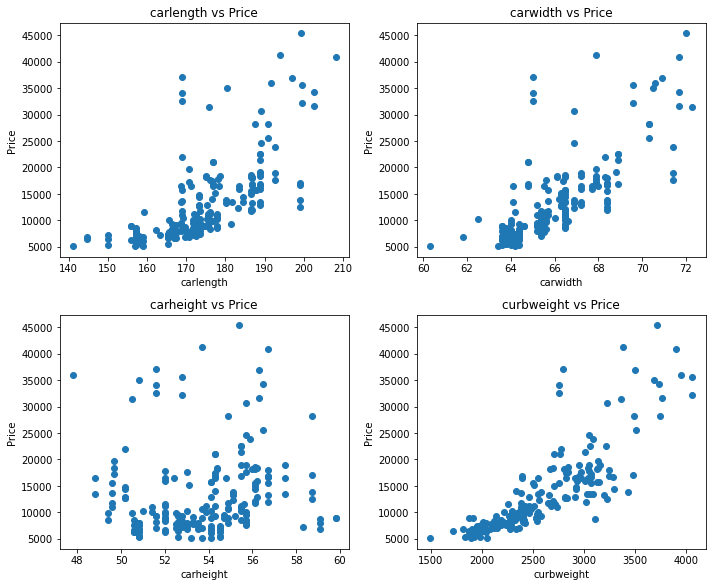

In [ ]:
def scatter(x, fig):

  plt.subplot(5, 2 , fig)
  plt.scatter(df[x], df['price'])
  plt.title(x + " vs Price")
  plt.ylabel("Price")
  plt.xlabel(x)

plt.figure(figsize=(10,20))
scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

### Feature Eng

In [ ]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [ ]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


## Bivariate Data Analysis

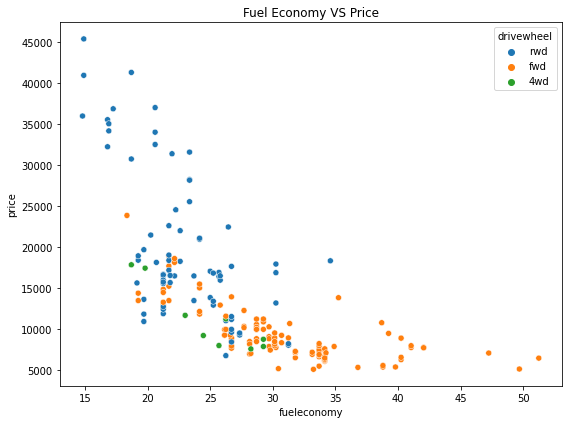

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.fueleconomy, y=df.price, hue=df.drivewheel)
plt.title("Fuel Economy VS Price")
plt.tight_layout()
plt.show()


In [ ]:
df_new = df[['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 
             'wheelbase', 'curbweight', 'enginetype', 'cylindernumber', 
             'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'carsrange']]

In [ ]:
df_new.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [ ]:
df_new.shape

(205, 16)

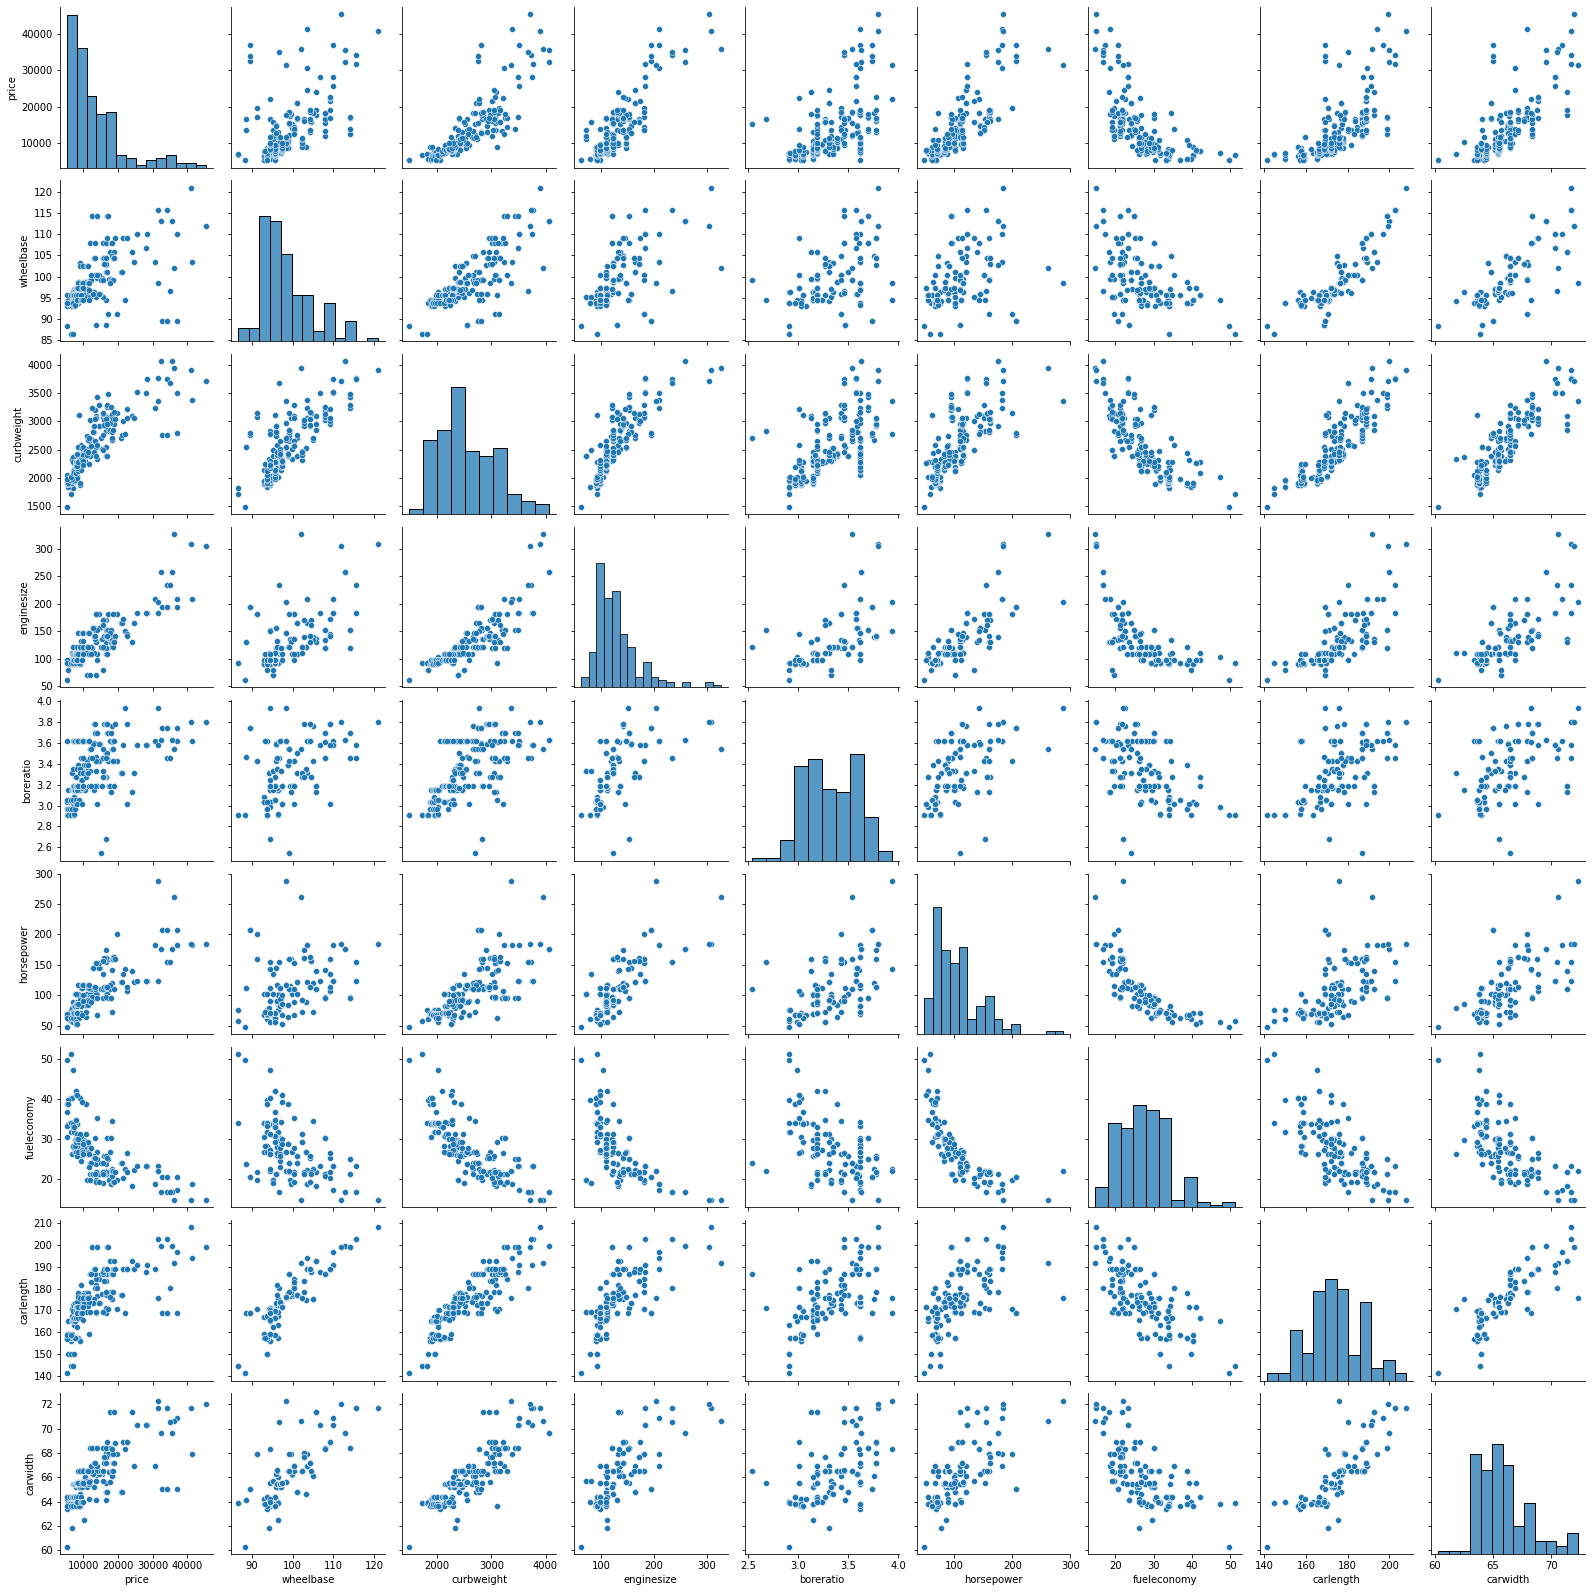

In [ ]:
sns.pairplot(df_new)
plt.show()

In [ ]:
cor = df.corr()
cor

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


In [ ]:
# Find out the Fields with high correlation

correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.8745874759642641 -- 3 -- 2 -- carlength -- wheelbase
0.8411182684818458 -- 4 -- 3 -- carwidth -- carlength
0.8777284608306424 -- 6 -- 3 -- curbweight -- carlength
0.8670324646791235 -- 6 -- 4 -- curbweight -- carwidth
0.8505940734262771 -- 7 -- 6 -- enginesize -- curbweight
0.8097686545377305 -- 11 -- 7 -- horsepower -- enginesize
0.8014561756662699 -- 13 -- 11 -- citympg -- horsepower
0.9713370423425063 -- 14 -- 13 -- highwaympg -- citympg
0.8353054372043703 -- 15 -- 6 -- price -- curbweight
0.8741451426986429 -- 15 -- 7 -- price -- enginesize
0.8081381197889801 -- 15 -- 11 -- price -- horsepower
0.9938444201653038 -- 16 -- 13 -- fueleconomy -- citympg
0.9916921560568329 -- 16 -- 14 -- fueleconomy -- highwaympg


In [ ]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')
------
{'curbweight', 'horsepower', 'highwaympg', 'enginesize', 'wheelbase', 'price', 'carlength', 'carwidth', 'fueleconomy', 'citympg'}


In [ ]:
cor['highwaympg']['citympg']

0.9713370423425063

In [ ]:
cor['highwaympg']['fueleconomy']

0.9916921560568329

In [ ]:
# Print the Correlation values of the High Correlated fields
corh = df[correlated_features].corr()
corh

,curbweight,horsepower,highwaympg,enginesize,wheelbase,price,carlength,carwidth,fueleconomy,citympg
curbweight,1.000000,0.750739,-0.797465,0.850594,0.776386,0.835305,0.877728,0.867032,-0.781535,-0.757414
horsepower,0.750739,1.000000,-0.770544,0.809769,0.353294,0.808138,0.552623,0.640732,-0.792822,-0.801456
highwaympg,-0.797465,-0.770544,1.000000,-0.677470,-0.544082,-0.697600,-0.704662,-0.677218,0.991692,0.971337
enginesize,0.850594,0.809769,-0.677470,1.000000,0.569329,0.874145,0.683360,0.735433,-0.669464,-0.653658
wheelbase,0.776386,0.353294,-0.544082,0.569329,1.000000,0.577816,0.874587,0.795144,-0.508136,-0.470414
price,0.835305,0.808138,-0.697600,0.874145,0.577816,1.000000,0.682921,0.759325,-0.696214,-0.685752
carlength,0.877728,0.552623,-0.704662,0.683360,0.874587,0.682921,1.000000,0.841118,-0.691472,-0.670909
carwidth,0.867032,0.640732,-0.677218,0.735433,0.795144,0.759325,0.841118,1.000000,-0.663419,-0.642704
fueleconomy,-0.781535,-0.792822,0.991692,-0.669464,-0.508136,-0.696214,-0.691472,-0.663419,1.000000,0.993844
citympg,-0.757414,-0.801456,0.971337,-0.653658,-0.470414,-0.685752,-0.670909,-0.642704,0.993844,1.000000


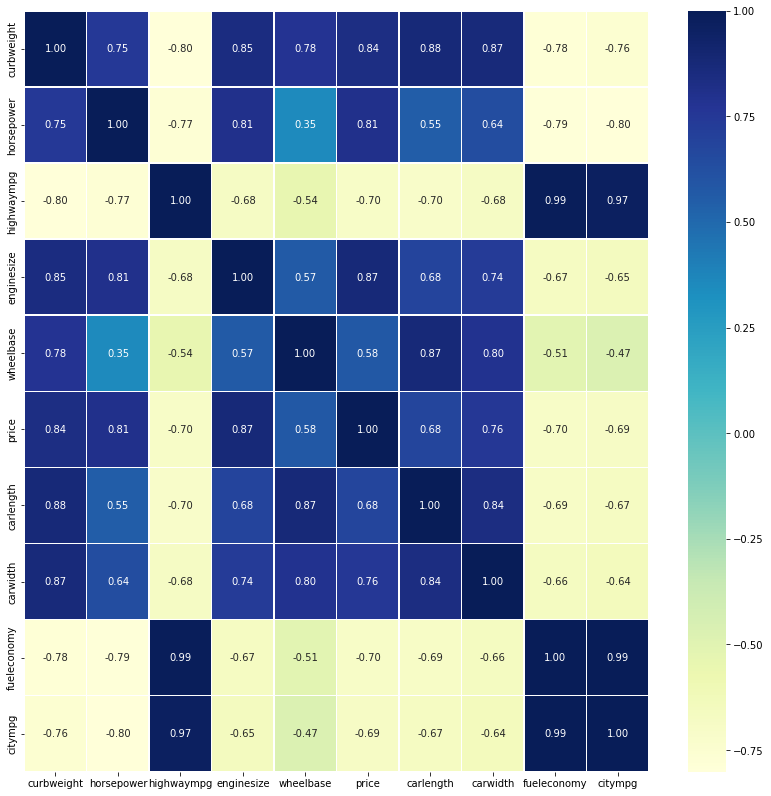

In [ ]:
# Produce a Heatmap

plt.figure(figsize=(14,14)) 
sns.heatmap(corh, annot=True, linewidths=.5, fmt=".2f", cmap="YlGnBu")

### Feature Engineering: Create Dummy Variables for Ordinal Variables

In [ ]:
print(df['fueltype'].unique())
print(df['aspiration'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['enginetype'].unique())
print(df['cylindernumber'].unique())
print(df['carsrange'].unique())
print(df['fuelsystem'].unique())
print(df['CompanyName'].unique())
print(df['doornumber'].unique())
print(df['enginelocation'].unique())

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['Medium', 'Highend', 'Budget']
Categories (3, object): ['Budget' < 'Medium' < 'Highend']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['two' 'four']
['front' 'rear']


In [ ]:
# Defining the map function

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the df_norm

df_norm = df
df_norm = dummies('fueltype',df_norm)
df_norm = dummies('aspiration',df_norm)
df_norm = dummies('carbody',df_norm)
df_norm = dummies('drivewheel',df_norm)
df_norm = dummies('enginetype',df_norm)
df_norm = dummies('cylindernumber',df_norm)
df_norm = dummies('carsrange',df_norm)
df_norm = dummies('CompanyName',df_norm)
df_norm = dummies('doornumber',df_norm)
df_norm = dummies('enginelocation',df_norm)
df_norm = dummies('fuelsystem',df_norm)

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int64  
 16  fueleconomy       205 non-null    float64
 1

In [ ]:
df_norm.shape

(205, 69)

## Model 

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(df_norm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
num_vars = ['wheelbase', 'carheight', 'stroke', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,9.4,0.083333,5500,31,38,0.068818,0.530864,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
125,126,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,9.5,0.395833,5500,19,27,0.466890,0.213992,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
166,167,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,9.4,0.266667,6600,26,29,0.122110,0.344307,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,2,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,9.0,0.262500,5000,21,27,0.314446,0.244170,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
199,200,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,7.5,0.475000,5100,17,22,0.382131,0.122085,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary())    # model summary
    return lm

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
model1 = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           3.34e-49
Time:                        18:12:26   Log-Likelihood:                 282.04
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                      84   BIC:                            -271.3
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4193      0.205  

In [ ]:
X_train.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueleconomy', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'Medium', 'Highend', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'two', 'rear', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [ ]:
X_train1 = X_train.drop(
['car_ID', 'wheelbase', 'carlength', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'hardtop',
 'sedan','wagon','fwd','rwd','dohcv','l','ohc','ohcf','ohcv','six','Medium',
'audi','buick','chevrolet','dodge','honda','isuzu','jaguar','mazda','nissan','porsche','renault','saab',
 'subaru','toyota','volkswagen','volvo','two','2bbl','4bbl','idi','mfi','mpfi','spdi'], axis=1)

#### Re-create the model after dropping the columns with 'P>|t|' > 0.05

In [ ]:
model2 = build_model(X_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           2.01e-69
Time:                        18:12:26   Log-Likelihood:                 239.59
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                     119   BIC:                            -360.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4296      0.103     -4.165      

In [ ]:
X_train1.columns

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'fueleconomy', 'gas', 'turbo',
       'hatchback', 'rotor', 'five', 'four', 'three', 'twelve', 'Highend',
       'bmw', 'mercury', 'mitsubishi', 'peugeot', 'plymouth', 'rear', 'spfi'],
      dtype='object')

In [ ]:
checkVIF(X_train1)

,Features,VIF
4,enginesize,163.83
7,peakrpm,131.25
3,curbweight,101.03
14,four,63.28
5,boreratio,46.17
1,carwidth,44.93
6,stroke,41.71
9,gas,32.65
8,fueleconomy,21.41
2,carheight,18.74


#### Based on the Variance inflation factor removing the above 5 values

In [ ]:
X_train2 = X_train1.drop(['enginesize', 'peakrpm', 'curbweight', 'four', 'boreratio', 
                          'carwidth', 'stroke', 'gas', 'fueleconomy', 'carheight', 'rotor'], axis=1)

In [ ]:
moddel3 = build_model(X_train2, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     28.43
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.10e-30
Time:                        18:12:26   Log-Likelihood:                 109.02
No. Observations:                 143   AIC:                            -192.0
Df Residuals:                     130   BIC:                            -153.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1479      0.016      9.528      0.0

### Feature Elimination using RFE (Recursive Feature Elimination)


In [ ]:
lm = LinearRegression()
lm.fit(X_train1,y_train)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train1, y_train)

In [ ]:
list(zip(X_train1.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 12),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('peakrpm', False, 14),
 ('fueleconomy', False, 11),
 ('gas', False, 13),
 ('turbo', False, 8),
 ('hatchback', False, 10),
 ('rotor', True, 1),
 ('five', False, 5),
 ('four', False, 4),
 ('three', True, 1),
 ('twelve', True, 1),
 ('Highend', True, 1),
 ('bmw', True, 1),
 ('mercury', False, 15),
 ('mitsubishi', False, 7),
 ('peugeot', False, 3),
 ('plymouth', False, 9),
 ('rear', True, 1),
 ('spfi', False, 16)]

In [ ]:
X_train1.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'rotor', 'three',
       'twelve', 'Highend', 'bmw', 'rear'],
      dtype='object')

In [ ]:
X_train1.columns

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'fueleconomy', 'gas', 'turbo',
       'hatchback', 'rotor', 'five', 'four', 'three', 'twelve', 'Highend',
       'bmw', 'mercury', 'mitsubishi', 'peugeot', 'plymouth', 'rear', 'spfi'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [ ]:
X_train_rfe = X_train[X_train1.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,rotor,three,twelve,Highend,bmw,rear
122,0.291667,0.272692,0.139623,0.230159,0,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,0,0,0,1,0,0
166,0.308333,0.314973,0.139623,0.444444,0,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,0,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,0,0,0,0,0,0


#### Create Model using RFE returned Features

In [ ]:
model4 = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.94e-69
Time:                        18:12:26   Log-Likelihood:                 202.89
No. Observations:                 143   AIC:                            -383.8
Df Residuals:                     132   BIC:                            -351.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1329      0.018     -7.455      0.0

p-vale of `twelve` seems to be higher than the significance value of 0.05

In [ ]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [ ]:
model5 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.99e-70
Time:                        18:12:26   Log-Likelihood:                 202.50
No. Observations:                 143   AIC:                            -385.0
Df Residuals:                     133   BIC:                            -355.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.018     -7.435      0.0

In [ ]:
X_train_new1 = sm.add_constant(X_train_new) 

In [ ]:
X_train_new1

,const,carwidth,curbweight,enginesize,boreratio,rotor,three,Highend,bmw,rear
122,1.0,0.291667,0.272692,0.139623,0.230159,0,0,0,0,0
125,1.0,0.666667,0.500388,0.339623,1.000000,0,0,1,0,0
166,1.0,0.308333,0.314973,0.139623,0.444444,0,0,0,0,0
1,1.0,0.316667,0.411171,0.260377,0.626984,0,0,0,0,0
199,1.0,0.575000,0.647401,0.260377,0.746032,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.425000,0.354926,0.184906,0.388889,0,0,0,0,0
103,1.0,0.516667,0.609775,0.452830,0.595238,0,0,0,0,0
67,1.0,0.833333,0.786268,0.460377,0.714286,0,0,1,0,0
24,1.0,0.291667,0.185803,0.109434,0.230159,0,0,0,0,0


In [ ]:
y_train_price = model5.predict(X_train_new1)

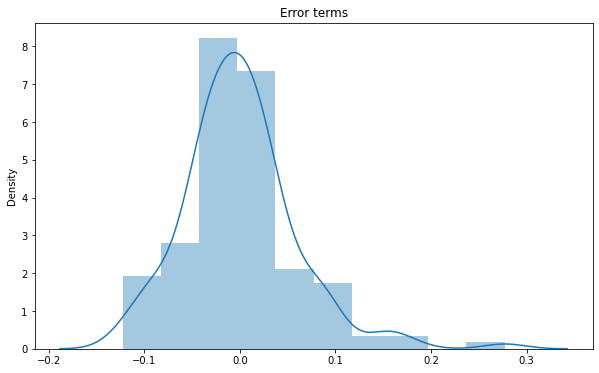

In [ ]:
# Plot the histogram for the error terms

fig = plt.figure(figsize=(10,6))
sns.distplot(y_train - y_train_price, bins=10)
plt.title("Error terms")
plt.show()

In [ ]:
df_test

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,161,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47,7738,42.05,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,187,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34,8495,30.15,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
59,60,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32,8845,28.70,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
165,166,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29,9298,27.35,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31,7603,28.25,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,88,5000,24,30,8921,26.70,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
29,30,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,7.0,145,5000,19,24,12964,21.25,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
182,183,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.40,23.0,52,4800,37,46,7775,41.05,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,9.0,86,5800,27,33,10295,29.70,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
num_vars = ['carwidth', 'curbweight', 'enginesize', 'boreratio', 'price', 'rotor', 'three', 'Highend', 'bmw', 'rear']

df_test1 = pd.DataFrame(scaler.fit_transform(df_test[num_vars]), columns=num_vars) 

In [ ]:
df_test1

,carwidth,curbweight,enginesize,boreratio,price,rotor,three,Highend,bmw,rear
0,0.200000,0.132148,0.082969,0.515873,0.058474,0.0,0.0,0.0,0.0,0.0
1,0.315789,0.219125,0.131004,0.515873,0.077398,0.0,0.0,0.0,0.0,0.0
2,0.421053,0.271985,0.187773,0.674603,0.086148,0.0,0.0,0.0,0.0,0.0
3,0.157895,0.214320,0.082969,0.555556,0.097473,0.0,0.0,0.0,0.0,0.0
4,0.136842,0.202307,0.126638,0.857143,0.055099,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57,0.221053,0.344065,0.187773,0.634921,0.088048,0.0,0.0,0.0,0.0,0.0
58,0.400000,0.476694,0.336245,0.841270,0.189120,0.0,0.0,0.0,0.0,0.0
59,0.315789,0.212398,0.078603,0.373016,0.059399,0.0,0.0,0.0,0.0,0.0
60,0.000000,0.265738,0.135371,0.484127,0.122397,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test = df_test1.pop('price')
X_test = df_test1

In [ ]:
y_test

0     0.058474
1     0.077398
2     0.086148
3     0.097473
4     0.055099
        ...   
57    0.088048
58    0.189120
59    0.059399
60    0.122397
61    0.790705
Name: price, Length: 62, dtype: float64

In [ ]:
X_test_new = pd.DataFrame(sm.add_constant(X_test))

In [ ]:
X_test_new

,const,carwidth,curbweight,enginesize,boreratio,rotor,three,Highend,bmw,rear
0,1.0,0.200000,0.132148,0.082969,0.515873,0.0,0.0,0.0,0.0,0.0
1,1.0,0.315789,0.219125,0.131004,0.515873,0.0,0.0,0.0,0.0,0.0
2,1.0,0.421053,0.271985,0.187773,0.674603,0.0,0.0,0.0,0.0,0.0
3,1.0,0.157895,0.214320,0.082969,0.555556,0.0,0.0,0.0,0.0,0.0
4,1.0,0.136842,0.202307,0.126638,0.857143,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57,1.0,0.221053,0.344065,0.187773,0.634921,0.0,0.0,0.0,0.0,0.0
58,1.0,0.400000,0.476694,0.336245,0.841270,0.0,0.0,0.0,0.0,0.0
59,1.0,0.315789,0.212398,0.078603,0.373016,0.0,0.0,0.0,0.0,0.0
60,1.0,0.000000,0.265738,0.135371,0.484127,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Making predictions
y_pred = model5.predict(X_test_new)

<Figure size 720x432 with 0 Axes>

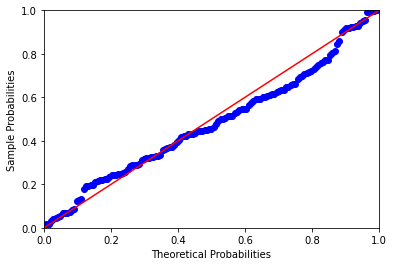

In [ ]:
## Residual Normality
resid = model5.resid
probplot = sm.ProbPlot(resid)
plt.figure(figsize=(10,6))
probplot.ppplot(line='45')
plt.show()

In [ ]:
print("Test Prediction R-Sqrd: ", r2_score(y_test, y_pred))

Test Prediction R-Sqrd:  0.8606328550795906


In [ ]:
print("Train Prediction R-Sqrd: ", r2_score(y_train, y_train_pred))

Train Prediction R-Sqrd:  0.9253685182104617


#### Inference :

- R-sqaured value for Training data is `92.5%` and for Test Data it is `86%`.

### Final Model

In [ ]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.99e-70
Time:                        18:12:27   Log-Likelihood:                 202.50
No. Observations:                 143   AIC:                            -385.0
Df Residuals:                     133   BIC:                            -355.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.018     -7.435      0.0